In [1]:
!pip install tensorflow


In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
import numpy as np
%matplotlib inline

In [3]:
(x_train,y_train),(x_test,y_test)=keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [4]:
len(x_train)

60000

In [5]:
#scaling
x_test=x_test/255
x_train=x_train/255

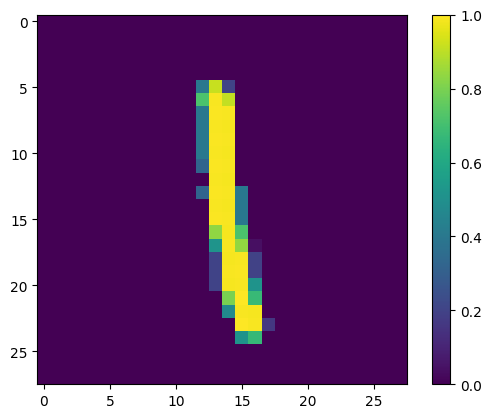

In [6]:
#take a look at our database
plt.figure()
plt.imshow(x_train[1544])
plt.colorbar()
plt.grid(False)
plt.show()

In [7]:
#flattening data
x_train_flattened=x_train.reshape(len(x_train),28*28)
x_test_flattened=x_test.reshape(len(x_test),28*28)

In [8]:
x_test_flattened[4]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [9]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4643 - accuracy: 0.8792
Epoch 2/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3042 - accuracy: 0.9142
Epoch 3/5
1875/1875 [==============================] - 10s 6ms/step - loss: 0.2834 - accuracy: 0.9211
Epoch 4/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2730 - accuracy: 0.9237
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2668 - accuracy: 0.9260


In [10]:
model.evaluate(x_test_flattened, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.2644 - accuracy: 0.9270


[0.2644113302230835, 0.9269999861717224]

In [11]:
model.evaluate(x_test_flattened, y_test)


313/313 [==============================] - 1s 2ms/step - loss: 0.2644 - accuracy: 0.9270


[0.2644113302230835, 0.9269999861717224]

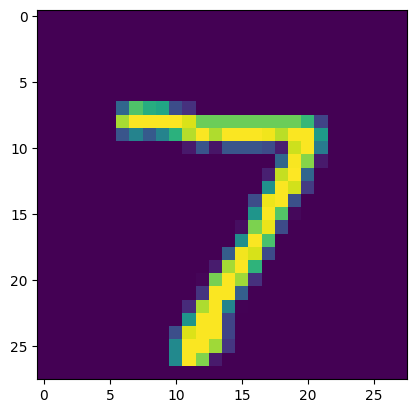

In [12]:
plt.imshow(x_test[0])


In [13]:
y_predicted = model.predict(x_test_flattened)
y_predicted[0]

313/313 [==============================] - 1s 1ms/step


array([2.0478634e-02, 6.1130714e-07, 7.8365833e-02, 9.6094751e-01,
       2.4107597e-03, 1.1960911e-01, 1.8077361e-06, 9.9984360e-01,
       1.1130270e-01, 7.0135146e-01], dtype=float32)

In [14]:
np.argmax(y_predicted[0])

7

In [15]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [16]:
#confusion matrix
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

Text(95.72222222222221, 0.5, 'Truth')

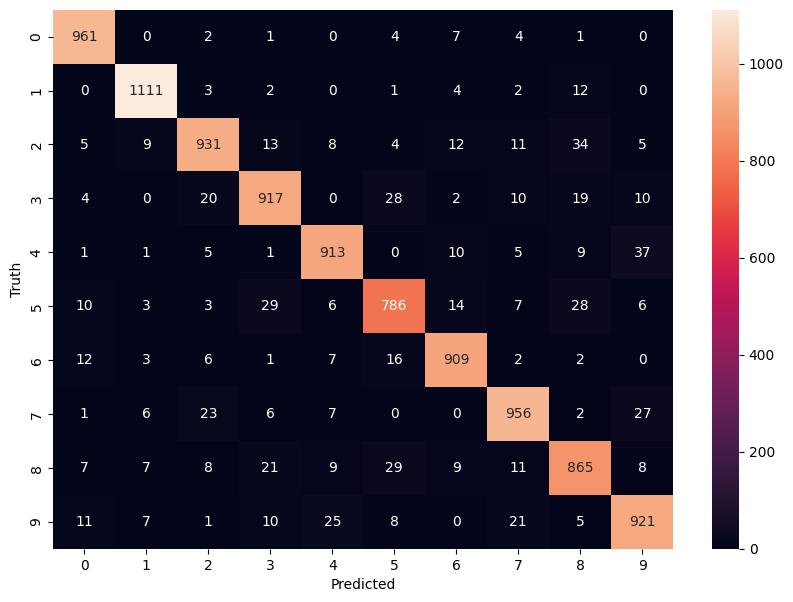

In [17]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [18]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2746 - accuracy: 0.9212
Epoch 2/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1237 - accuracy: 0.9640
Epoch 3/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0874 - accuracy: 0.9743
Epoch 4/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0666 - accuracy: 0.9799
Epoch 5/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0541 - accuracy: 0.9836


In [19]:
y_predicted_labels=model.predict(x_test_flattened)
y_predicted_labels = [np.argmax(i) for i in y_predicted]


313/313 [==============================] - 1s 2ms/step


In [20]:
y_predicted = model.predict(x_test_flattened)
y_predicted_labels = [np.argmax(i) for i in y_predicted]

313/313 [==============================] - 1s 2ms/step


Text(95.72222222222221, 0.5, 'Truth')

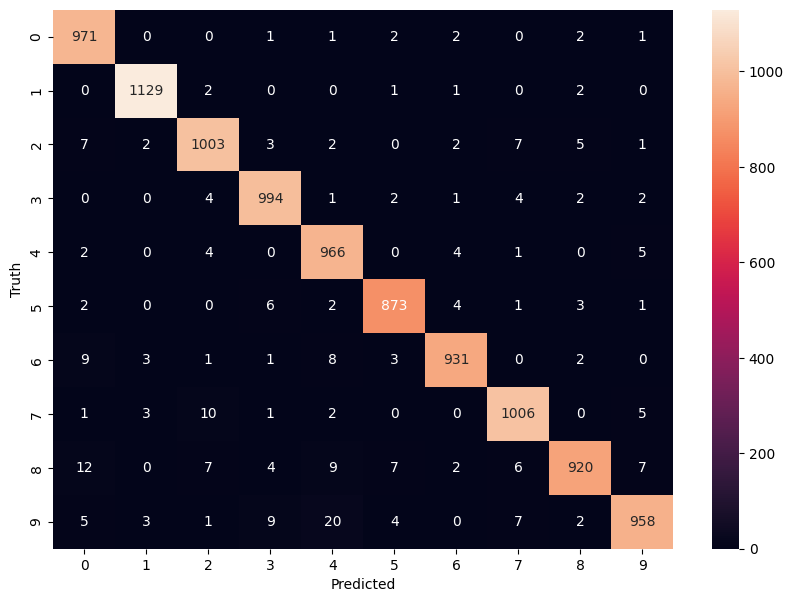

In [21]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')